In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Student_performance_data.csv'
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(df.head())

   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass  
0             0  2.929196         2.0  
1             0  3

In [ ]:
df.shape

(2392, 15)

In [ ]:
total = df.isnull().sum().sort_values(ascending=False)
total

,0
StudentID,0
Age,0
Gender,0
Ethnicity,0
ParentalEducation,0
StudyTimeWeekly,0
Absences,0
Tutoring,0
ParentalSupport,0
Extracurricular,0


In [ ]:
male_tutoring = df[(df['Gender'] == 0) & (df['Tutoring'] == 1)]
total_tutoring = df[df['Tutoring'] == 1]
percentage_male_tutoring = (len(male_tutoring) / len(total_tutoring)) * 100

print(f'Percentage of male students who participate in tutoring: {percentage_male_tutoring:.2f}%')

Percentage of male students who participate in tutoring: 51.32%


In [ ]:
women_tutoring = df[(df['Gender'] == 1) & (df['Tutoring'] == 1)]
total_tutoring = df[df['Tutoring'] == 1]
percentage_women_tutoring = (len(women_tutoring) / len(total_tutoring)) * 100

print(f'Percentage of women students who participate in tutoring: {percentage_women_tutoring:.2f}%')

Percentage of women students who participate in tutoring: 48.68%


In [ ]:
male_students = df[df['Gender'] == 0]

male_tutoring_gpa = male_students[male_students['Tutoring'] == 1]['GPA'].mean()
male_no_tutoring_gpa = male_students[male_students['Tutoring'] == 0]['GPA'].mean()

print(f'Average GPA for male students who participate in tutoring: {male_tutoring_gpa:.2f}')
print(f'Average GPA for male students who do not participate in tutoring: {male_no_tutoring_gpa:.2f}')

Average GPA for male students who participate in tutoring: 2.12
Average GPA for male students who do not participate in tutoring: 1.83


In [ ]:
female_students = df[df['Gender'] == 1]

female_tutoring_gpa = female_students[female_students['Tutoring'] == 1]['GPA'].mean()
female_no_tutoring_gpa = female_students[female_students['Tutoring'] == 0]['GPA'].mean()

print(f'Average GPA for female students who participate in tutoring: {female_tutoring_gpa:.2f}')
print(f'Average GPA for female students who do not participate in tutoring: {female_no_tutoring_gpa:.2f}')

Average GPA for female students who participate in tutoring: 2.10
Average GPA for female students who do not participate in tutoring: 1.81


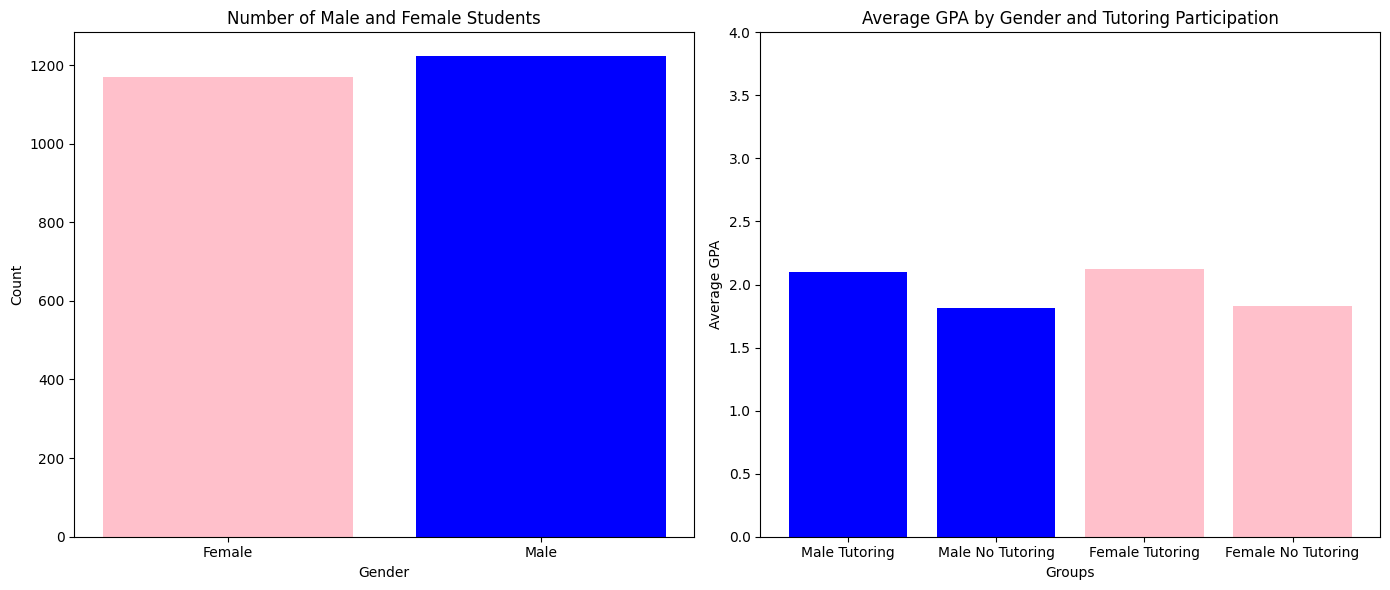

In [ ]:
import matplotlib.pyplot as plt

# Calculate the number of male and female students
gender_counts = df['Gender'].value_counts()

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot the number of male and female students
ax[0].bar(gender_counts.index, gender_counts.values, color=['blue', 'pink'])
ax[0].set_xlabel('Gender')
ax[0].set_ylabel('Count')
ax[0].set_title('Number of Male and Female Students')
ax[0].set_xticks([0, 1])
ax[0].set_xticklabels(['Female', 'Male'])

# Plot the average GPA by gender and tutoring participation
labels = ['Male Tutoring', 'Male No Tutoring', 'Female Tutoring', 'Female No Tutoring']
gpa_values = [male_tutoring_gpa, male_no_tutoring_gpa, female_tutoring_gpa, female_no_tutoring_gpa]

ax[1].bar(labels, gpa_values, color=['blue', 'blue', 'pink', 'pink'])
ax[1].set_xlabel('Groups')
ax[1].set_ylabel('Average GPA')
ax[1].set_title('Average GPA by Gender and Tutoring Participation')
ax[1].set_ylim(0, 4)  # Dengan Asumsi GPA di angka 4.0

plt.tight_layout()
plt.show()

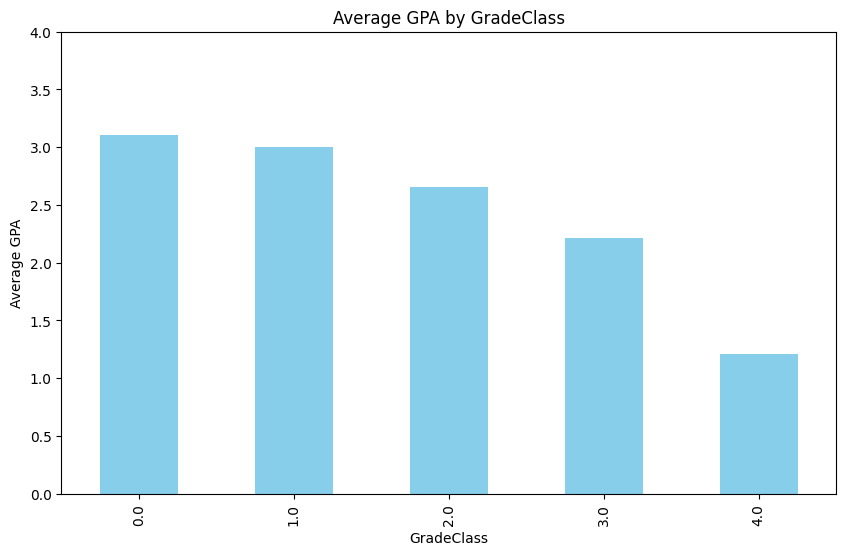

In [ ]:
# Calculate the average GPA for each GradeClass
average_gpa_by_gradeclass = df.groupby('GradeClass')['GPA'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
average_gpa_by_gradeclass.plot(kind='bar', color='skyblue')
plt.xlabel('GradeClass')
plt.ylabel('Average GPA')
plt.title('Average GPA by GradeClass')
plt.ylim(0, 4)  # Dengan Asumsi GPA di angka 4.0
plt.show()


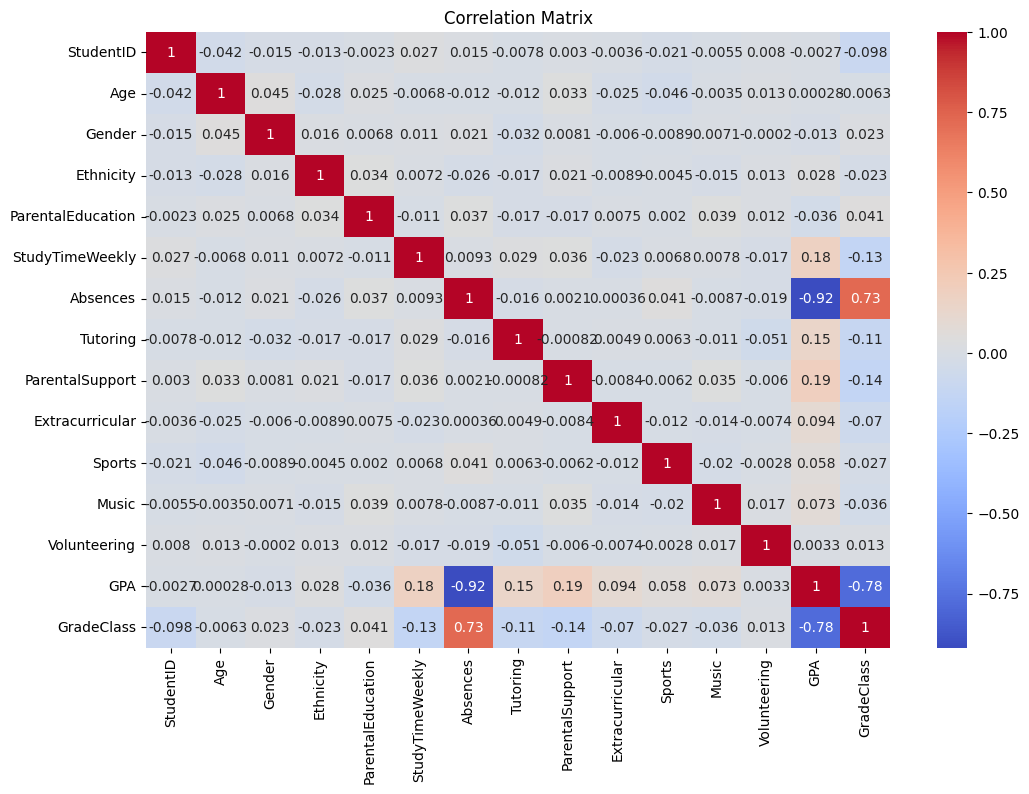

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

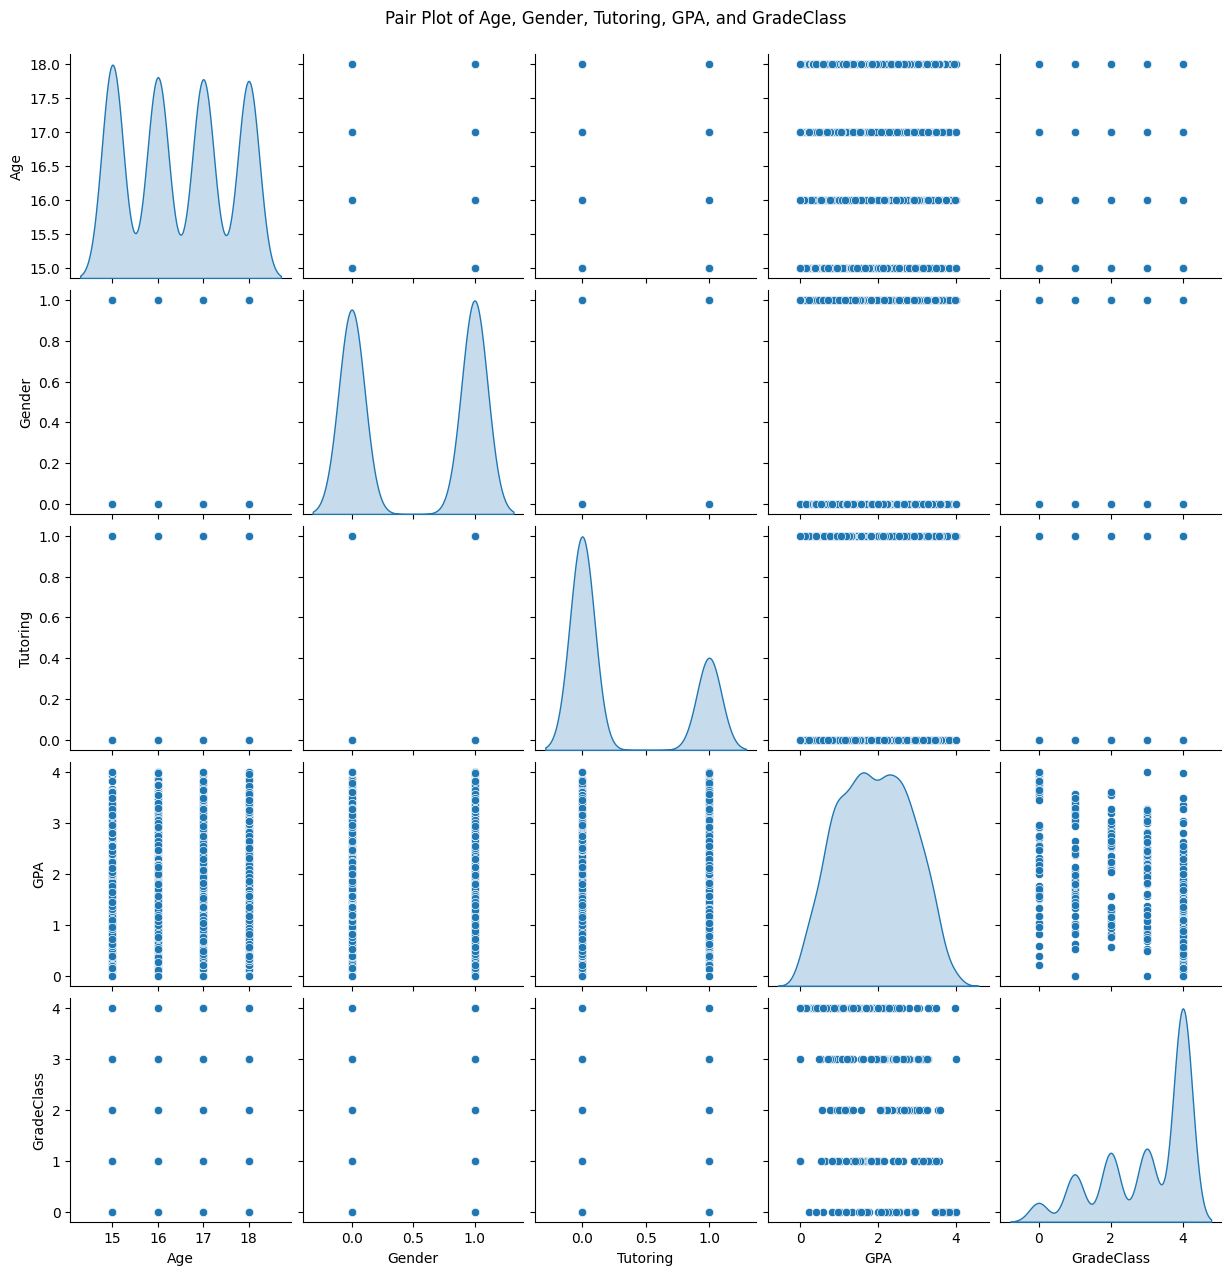

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the relevant columns for the pair plot
selected_columns = df[['Age', 'Gender', 'Tutoring', 'GPA', 'GradeClass']]

# Create the pair plot
sns.pairplot(selected_columns, diag_kind='kde')
plt.suptitle('Pair Plot of Age, Gender, Tutoring, GPA, and GradeClass', y=1.02)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Define the features and target variable
X = df[['Age', 'Gender', 'Tutoring', 'GradeClass']]
y = df['GPA']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'MAE: {mae}')
print(f'MSE: {mse}')


MAE: 0.40656921182128797
MSE: 0.29421594082891683


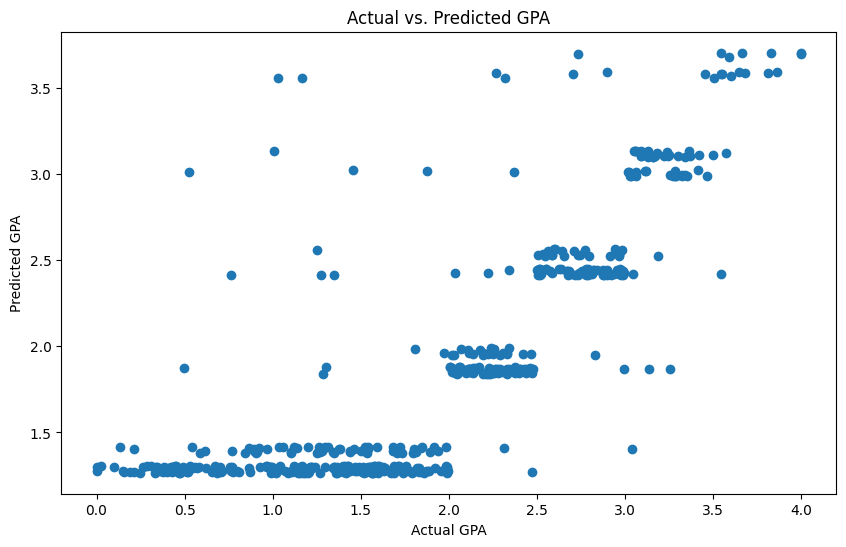

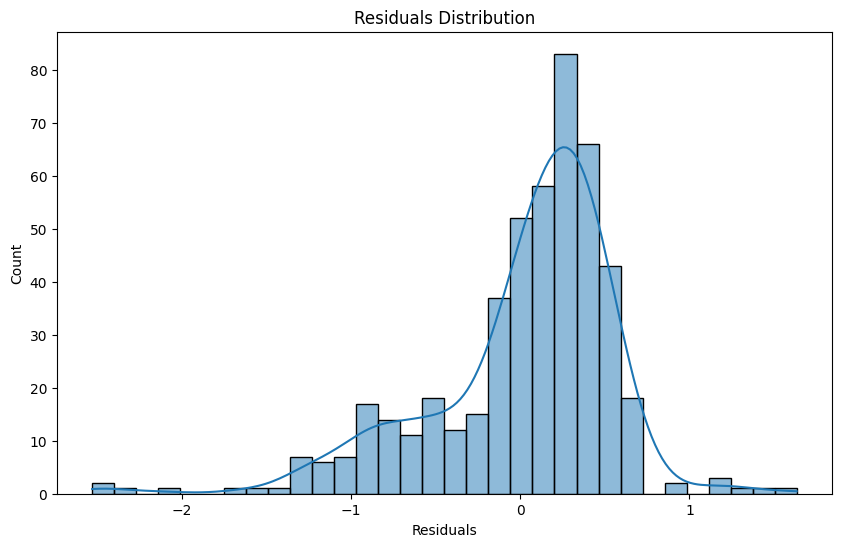

In [ ]:
 plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual GPA')
plt.ylabel('Predicted GPA')
plt.title('Actual vs. Predicted GPA')
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Residuals Distribution')
plt.show()
